# Neural Network Preliminary Code

## Import Libraries

In [11]:
%%capture
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, auc
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import AUC
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Embedding

import os
import glob
import fileinput
import matplotlib.pyplot as plt
import seaborn as sns

## Import data, split into training/validation/testing sets, and process model

In [12]:
# list of scenarios
scenarios = ['5.txt', '6.txt', '7.txt', '11.txt', '12.txt']

# empty list to capture statistics for each scenario
results = [] 
precision_recall_all = pd.DataFrame()

In [13]:
from keras.engine.input_layer import Input
# iterate over scenarios to build, train, and evaluate LSTM model
for filename in scenarios:

    scenario_name = filename.replace(".txt", "")
    # load the dataset
    scenario = np.loadtxt('/content/' + filename, delimiter=',')

    # split into input (X) and output (y) variables
    X = scenario[:,1:]
    y = scenario[:,0]

    # split into training (80%), validation (10%), and test (10%) sets
    rand_seed = 123
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.8,
                                                      random_state = rand_seed,
                                                      stratify = y)
    X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, 
                                                        train_size = 0.5,
                                                        random_state = rand_seed,
                                                        stratify = y_rem)
    
    # build NN model
  
    model = Sequential()
    model.add(Dense(12, input_dim = 28, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation = 'sigmoid'))

    #compile and fit the model
    model.compile(loss='binary_crossentropy', optimizer = 'adam',
                  metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size = 32, epochs = 3,
              validation_data=(X_valid, y_valid))
    
    #make predictions with model and print classification report
    predictions = (model.predict(X_test) > .5).astype(int)
    print(filename)
    print(classification_report(y_test, predictions))

    # calculate metrics for each model
    precision, recall, fscore, support = score(y_test, predictions, 
                                               average = 'binary')
    auc = roc_auc_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)


    # append metrics to results
    results.append(
        {
          'Scenario': scenario_name,
          'Precision': precision,
          'Recall': recall,
          'F1 Score': fscore,
          'AUC': auc
        })
    
    # write data for precision recall curves to csv
    cols = ['precision', 'recall', 'thresholds']
    precision_recall = precision_recall_curve(y_test, model.predict(X_test))
    precision_recall = pd.DataFrame(precision_recall, index = cols).transpose()
    precision_recall['scenario'] = filename
    precision_recall_all = precision_recall_all.append(precision_recall)

    print("scenario", filename, "complete")

Epoch 1/3
3246/3246 [==============================] - 11s 3ms/step - loss: 9341273088.0000 - accuracy: 0.9539 - val_loss: 725092.8750 - val_accuracy: 0.9931
Epoch 2/3
3246/3246 [==============================] - 10s 3ms/step - loss: 230269920.0000 - accuracy: 0.9869 - val_loss: 193261.7344 - val_accuracy: 0.9931
Epoch 3/3
406/406 [==============================] - 1s 2ms/step
5.txt
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     12894
         1.0       0.00      0.00      0.00        90

    accuracy                           0.99     12984
   macro avg       0.50      0.50      0.50     12984
weighted avg       0.99      0.99      0.99     12984

 34/406 [=>............................] - ETA: 0s 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

406/406 [==============================] - 1s 2ms/step
scenario 5.txt complete
Epoch 1/3
13973/13973 [==============================] - 40s 3ms/step - loss: 1702627840.0000 - accuracy: 0.9789 - val_loss: 1052968.7500 - val_accuracy: 0.9917
Epoch 2/3
13973/13973 [==============================] - 39s 3ms/step - loss: 7849540.0000 - accuracy: 0.9906 - val_loss: 0.0473 - val_accuracy: 0.9917
Epoch 3/3
1747/1747 [==============================] - 4s 2ms/step
6.txt
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55429
         1.0       0.00      0.00      0.00       463

    accuracy                           0.99     55892
   macro avg       0.50      0.50      0.50     55892
weighted avg       0.98      0.99      0.99     55892

   1/1747 [..............................] - ETA: 51s

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

1747/1747 [==============================] - 3s 2ms/step
scenario 6.txt complete
Epoch 1/3
2852/2852 [==============================] - 10s 3ms/step - loss: 1336618752.0000 - accuracy: 0.9629 - val_loss: 19683.3242 - val_accuracy: 0.9994
Epoch 2/3
2852/2852 [==============================] - 9s 3ms/step - loss: 48527452.0000 - accuracy: 0.9967 - val_loss: 11113.4492 - val_accuracy: 0.9994
Epoch 3/3
357/357 [==============================] - 1s 2ms/step
7.txt
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11402
         1.0       0.00      0.00      0.00         6

    accuracy                           1.00     11408
   macro avg       0.50      0.50      0.50     11408
weighted avg       1.00      1.00      1.00     11408

 32/357 [=>............................] - ETA: 0s

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

357/357 [==============================] - 1s 2ms/step
scenario 7.txt complete
Epoch 1/3
2682/2682 [==============================] - 10s 3ms/step - loss: 3147241728.0000 - accuracy: 0.8556 - val_loss: 192313.1719 - val_accuracy: 0.9239
Epoch 2/3
2682/2682 [==============================] - 8s 3ms/step - loss: 70288432.0000 - accuracy: 0.9103 - val_loss: 148646.4062 - val_accuracy: 0.9239
Epoch 3/3
336/336 [==============================] - 1s 2ms/step
11.txt
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      9909
         1.0       0.00      0.00      0.00       817

    accuracy                           0.92     10726
   macro avg       0.46      0.50      0.48     10726
weighted avg       0.85      0.92      0.89     10726

 68/336 [=====>........................] - ETA: 0s

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

336/336 [==============================] - 1s 2ms/step
scenario 11.txt complete
Epoch 1/3
8137/8137 [==============================] - 25s 3ms/step - loss: 1153844736.0000 - accuracy: 0.9728 - val_loss: 9311.1514 - val_accuracy: 0.9933
Epoch 2/3
8137/8137 [==============================] - 23s 3ms/step - loss: 46165348.0000 - accuracy: 0.9924 - val_loss: 2912.2795 - val_accuracy: 0.9933
Epoch 3/3
1018/1018 [==============================] - 2s 2ms/step
12.txt
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     32331
         1.0       0.00      0.00      0.00       217

    accuracy                           0.99     32548
   macro avg       0.50      0.50      0.50     32548
weighted avg       0.99      0.99      0.99     32548

  32/1018 [..............................] - ETA: 1s 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

1018/1018 [==============================] - 2s 2ms/step
scenario 12.txt complete


In [18]:
results_df = pd.DataFrame(results).sort_values('Scenario')
results_df

,Scenario,Precision,Recall,F1 Score,AUC
3,11,0.0,0.0,0.0,0.5
4,12,0.0,0.0,0.0,0.5
0,5,0.0,0.0,0.0,0.5
1,6,0.0,0.0,0.0,0.5
2,7,0.0,0.0,0.0,0.5


In [15]:
# print results and precision_recall to csv
results_df.to_csv('results.csv') 
precision_recall_all.to_csv('precision_recall.csv')

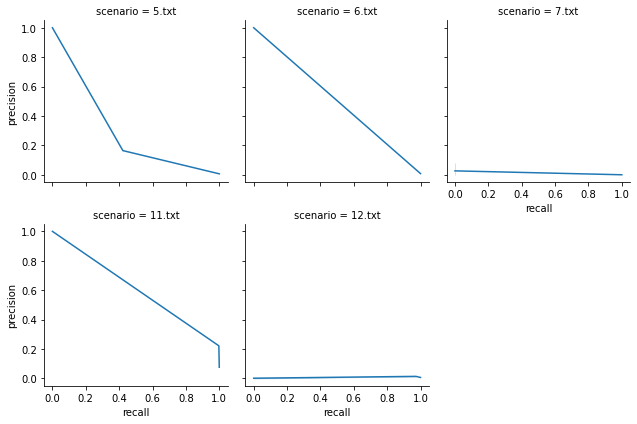

In [16]:
# precision recall graphs for each scenario
graph = sns.FacetGrid(precision_recall_all, col = 'scenario', col_wrap = 3)
graph.map(sns.lineplot, 'recall', 'precision')

In [ ]:
    #old model fitting
    model = Sequential()
    model.add(Dense(12, input_dim = 28, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# layers model fitting


    #input for variable-length sequences of integers
    inputs = keras.Input(shape = (None, ), dtype = "int32")
    #embed each integer in a 28,128-dimensional vector
    x = layers.Embedding(X.shape[1], 128)(inputs)
    #Add 3 hidden layers with dropout
    x = layers.Dense(12, input_dim = 28, activation = 'relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(8, activation = 'relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(8, activation = 'relu')(x)
    x = layers.Dropout(0.2)(x)
    #Add a classifier
    outputs = layers.Dense(1, activation = 'sigmoid')(x)
    x = layers.GlobalAveragePooling2D()
    model = keras.Model(inputs, outputs)